## WordClouds

#### WordClouds represent the importance of a word by its frequency. The more a word appears in a document, the more prominent it is displayed


##### We start by loading relevant libraries. You might have to install the wordcloud package via pip.

In [9]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

##### The data we are using is a subset of tweets sent out by users on their New Year's resolutions for 2015. We will generate a WordCloud on the text of the tweets

In [3]:
df = pd.read_csv("2015-nyrs.csv", engine='python')

In [4]:
df.head()

,other_topic,resolution_topics,gender,name,Resolution_Category,retweet_count,text,tweet_coord,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,user_timezone,tweet_region
0,"Read moore books, read less facebook.",Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",NaN,12/31/14 10:48,12/31/14,5.503630e+17,Southern California,CA,Pacific Time (US & Canada),West
1,NaN,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,NaN,12/31/14 10:47,12/31/14,5.503630e+17,New Jersey,NJ,Central Time (US & Canada),Northeast
2,NaN,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,NaN,12/31/14 10:46,12/31/14,5.503620e+17,Hollywood,CA,Eastern Time (US & Canada),West
3,Help More\nspread pet therapy|helping other,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,NaN,12/31/14 10:45,12/31/14,5.503620e+17,Metro NYC,NY,NaN,Northeast
4,NaN,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,NaN,12/31/14 10:44,12/31/14,5.503620e+17,"Pittsburgh, Pennsylvania",PA,Eastern Time (US & Canada),Northeast


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 15 columns):
other_topic            1364 non-null object
resolution_topics      5011 non-null object
gender                 5011 non-null object
name                   5011 non-null object
Resolution_Category    5011 non-null object
retweet_count          3139 non-null float64
text                   5011 non-null object
tweet_coord            227 non-null object
tweet_created          5011 non-null object
tweet_date             5011 non-null object
tweet_id               5011 non-null float64
tweet_location         5011 non-null object
tweet_state            5011 non-null object
user_timezone          3709 non-null object
tweet_region           5011 non-null object
dtypes: float64(2), object(13)
memory usage: 587.4+ KB


##### Let's make a wordcloud on the very first tweet

In [6]:
text = df.text[0]

##### We can specify the background color along with other aesthetic parameters

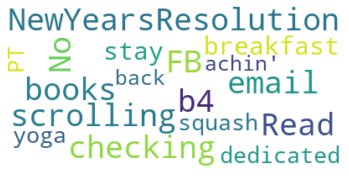

In [10]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

##### This isn't the best application of wordclouds as you need to have a large corpus (collection) of text. So let's apply it on the entire data.

In [11]:
text = " ".join(review.lower() for review in df.text)
text[:1000]

"#newyearsresolution :: read more books, no scrolling fb/checking email b4 breakfast, stay dedicated to pt/yoga to squash my achin' back! #newyearsresolution finally master @zj10 's part of kitchen sink #newyearsresolution to stop being so damn perf _���_��� my #newyearsresolution is to help my disabled patients discover the emotional and physical therapy from loving a pet. #adoptarescue #newyearsresolution #2015goals #2015bucketlist continued��_��� http://t.co/h4p9b7twjg #newyearsresolution 1. eat less.\n2.quit lying. my #newyearsresolution \n\n-learn how to drive.\n-apologize less.\n-read and write more.\n-get a 4.0 this upcoming quarter\n-drop my mixtape ���@becca3129 #newyearsresolution #forreal #thestruggle http://t.co/y1kabowmbv�\u06dddamn..this is so true. save a pit bulls life #newyearsresolution rt @_dear_leader_: #newyearsresolution - i will get a decent haircut. lost a lot this year...no more tears for the next. #newyearsresolution #todolist ���@blogbooktours: this is you al

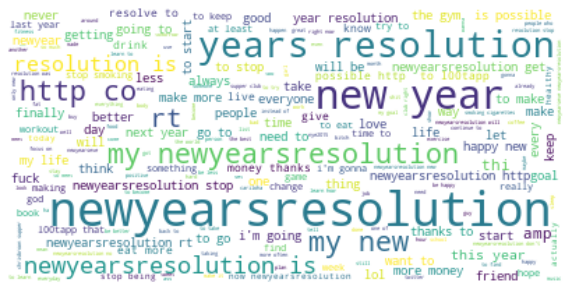

In [12]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

##### We notice a lot of words that are a combination of new years resolution, because that's the main topic of this text set, so we need to come up with a way to remove them. 

##### We also need to remove common words, prepositions, articles, etc. from the final wordcloud. These words are called stopwords and do not convey any relevant information.

In [13]:
stopwords = set(STOPWORDS)

##### We will also add some more words to the stopwords set because they are deemed stopwords for this data, like new year, resolution, etc.

In [14]:
stopwords.update(['new year','new','years','resolution','year','rt','amp','thi','newyearsresolution','will'])

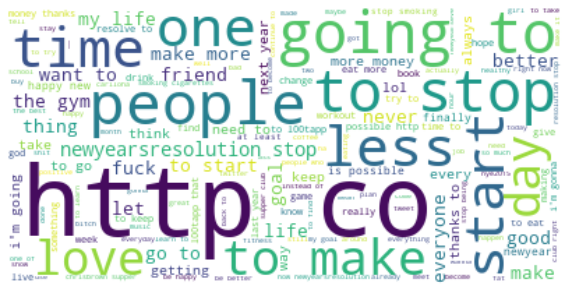

In [15]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

##### This is much better! But we now have an issue with weblinks, or small pieces of them, being most frequent. So we will remove all weblinks using regular expressions.

In [16]:
import re
text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

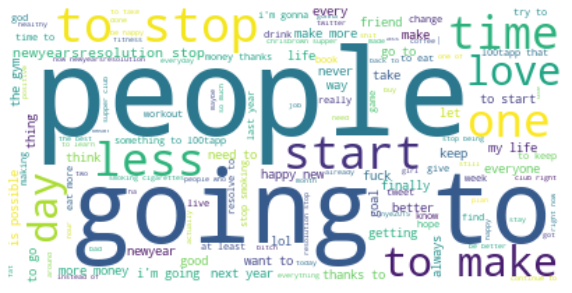

In [17]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

##### Now we finally get to a meaningful wordcloud. Usually 80% of the time is spent cleaning up the text for these kinds of analyses.